In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
#IRIS dataset
iris=datasets.load_iris()


In [16]:
iris_data=pd.DataFrame(iris.data)

In [19]:
iris_data.columns=iris.feature_names

In [20]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
#Apply feature scaling 
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_scale=scaler.fit_transform(iris_data)

In [23]:
X_scale

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [24]:
X_scale.shape

(150, 4)

In [25]:
##Apply PCA 
# It is used to reduce the number of dimensions 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [29]:
pca_scale=pca.fit_transform(X_scale)
pca_scale.shape    #reduce to 2 dimension

(150, 2)

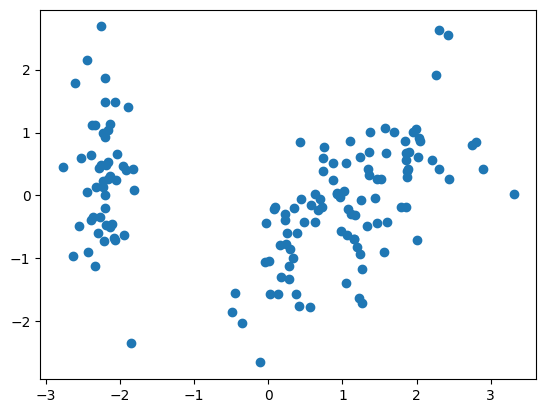

In [34]:
plt.scatter(pca_scale[:,0],pca_scale[:,1])

Text(0, 0.5, 'Eucledian Distance')

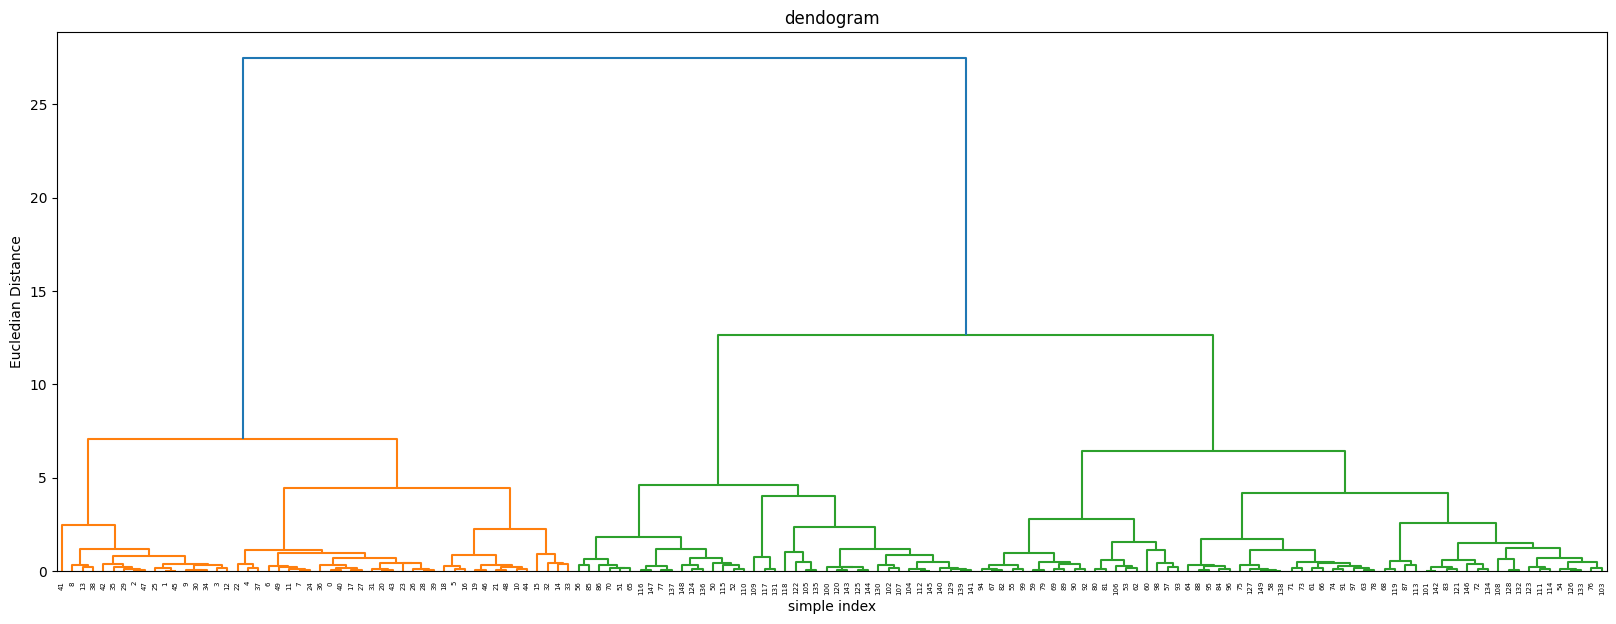

In [38]:
#Now starts Hierarchial clustering
#Agglomerative Clustering 
#V.IMP is to create a dendogram and to create dendogram we need scipy library
import scipy.cluster.hierarchy as sc

#Plot dendogram
plt.figure(figsize=(20,7))
plt.title("dendogram")

#create dendogram
sc.dendrogram(sc.linkage(pca_scale,method='ward'))
plt.title("dendogram")
plt.xlabel("simple index")
plt.ylabel("Eucledian Distance")

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scale)

AgglomerativeClustering()

In [46]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

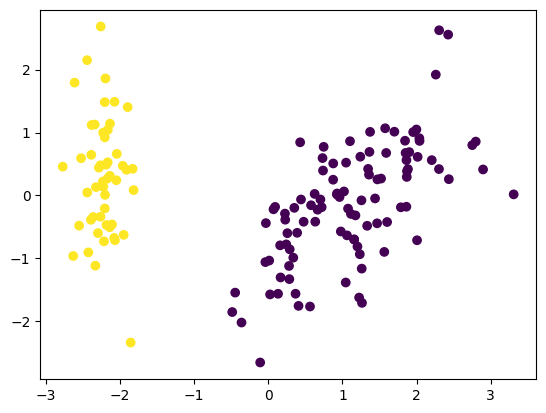

In [44]:
plt.scatter(pca_scale[:,0],pca_scale[:,1],c=cluster.labels_)